In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import *
import copy
import time
import pandas as pd
import matplotlib.pyplot as plt
from fractions import Fraction
from math import factorial
from google.colab import files
import csv
from scipy.integrate import odeint

# Старый импорт

In [ ]:
def good_output(a: list, approx = False) -> None:
    "Привычный вывод матрицы"
    if (approx):
        for row in a:
            print(*[eval(str(el)) for el in row])
    else:
        for row in a:
            print(*row)

def sum_of_matrix(a1:list, a2:list) -> list:
    "Return sum of matrixes or ERROR-message"
    ans = copy.deepcopy(a1)

    if (len(a1) != len(a2)):
        return 'ERROR: dimension error'

    for i in range(len(a1)):
        if (len(a1[i]) != len(a2[i])):
            return 'ERROR: dimension error'
        for j in range(len(a1[i])):
            ans[i][j] += a2[i][j]


    return ans

def mul_by_number(matrix:list, coef:complex) -> list:
    "Return matrix multiplied by coef"
    ans = copy.deepcopy(matrix)
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            ans[i][j] *= coef

    return ans

def multiply_matrix(a1:list, a2:list) -> list:
    "Return matrix multiplied by other or an ERROR-message"
    if (len(a1[0]) != len(a2)):
        return 'ERROR: dimension error'

    ans = [[0 for i in range(len(a1))] for j in range(len(a2[0]))]

    for i in range(len(a1)):
        for j in range(len(a2[0])):
            for cnt in range(len(a1[0])):
                ans[i][j] += a1[i][cnt] * a2[cnt][j]

    return ans



def determinant(matrix:list) -> complex:
    "Return det(matrix)"
    if (len(matrix) != len(matrix[0])):
        return 'ERROR: non-square matrix'

    if (len(matrix) == 1):
        return matrix[0][0]

    ans = 0
    sign = 1
    for i in range(len(matrix)):
        adding_matrix = list(zip(*matrix[1:]))
        adding_matrix.pop(i)
        adding_matrix = list(zip(*adding_matrix))
        ans += sign * matrix[0][i] * determinant(adding_matrix)
        sign *= -1
    return ans




def transpose(matrix:list) -> list:
    "Return transposed matrix" #доп память
    return [[matrix[j][i] for j in range(len(matrix))]
            for i in range(len(matrix[0])) ]


def adjugate_matrix(matrix: list) -> list:
    ans = [[0 for i in range(len(matrix))] for j in range(len(matrix))]
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            minor = copy.deepcopy(matrix)
            
            minor.pop(i)
            minor = list(zip(*minor))

            minor.pop(j)
            minor = list(zip(*minor))
            ans[i][j] = (-1) ** (i + j) * determinant(minor)


    return transpose(ans)

def invertible_matrix(matrix: list) -> list:
    print(matrix)
    if (determinant(matrix) == 0):
        return np.full((len(matrix), len(matrix)), 1000000000)
    return mul_by_number(adjugate_matrix(matrix), 1 / determinant(matrix))

def get_norm_inf(matrix:list) -> complex:
    ans = sum([abs(el) for el in matrix[0]])
    for i in range(1, len(matrix)):
        ans = max(ans, sum([abs(el) for el in matrix[0]]))

    return ans

def get_norm_2(matrix) -> complex:
    s = 0
    for row in matrix:
        for el in row:
            s += el ** 2
    return s ** 0.5

def get_cond(matrix: list) -> complex:
    a_inv = invertible_matrix(matrix)
    if (type(a_inv) != type('s')):
        cond = get_norm_inf(matrix) * get_norm_inf(a_inv)
        return cond
    else:
        return 10000000000000000

def input_for_user() -> list:
    "Interaction with user. Input matrix"
    n = int(input('Введите размерность матрицы, n: '))
    while (n < 1):
        print('Ай эм вери сори, бат 0 из нот гоинг то ворк, репит плиз')
        n = int(input('Введите размерность матрицы: '))
        
    m = int(input('Введите размерность матрицы m: '))
    type_of_data_chosen =(
     input('Выберите нужный вам тип данных: i - int, f - float, c - complex, fr - fraction: '))
    type_of_data = ['int', 'float', 'complex', 'Fraction']
    if (type_of_data_chosen == 'i'):
        type_of_data_chosen = '0'
    if (type_of_data_chosen == 'f'):
        type_of_data_chosen = '1'
    if (type_of_data_chosen == 'c'):
        type_of_data_chosen = '2'
    if (type_of_data_chosen == 'fr'):
        type_of_data_chosen = '3'

    users_data = [[0 for j in range(m)] for i in range(n)]
    #print(users_data)

    type_of_data_chosen = int(type_of_data_chosen)
    print('Вводите числа матрицы по одному')
    for i in range(n):
        for j in range(m):
            el = input()
            el = el.replace('i', 'j')
            el = el.replace(' ', '')
            if (el[-1] != 'j'):
                el1 = ''
                for q in range(len(el)):
                    if (el[q] == 'j'):
                        el1 = el[q+1:] + '+' + el[:q+1]
                if (el1 != ''):
                    el = el1
            el = get_fr(el)
            number = eval(type_of_data[type_of_data_chosen])(el)
            #print(i, j, number)
            users_data[i][j] = number

    return users_data

def Gauss_Jordan(coefs, results):
    #getting coefs|identity|res
    working_matrix = [coefs[j] + [0 for i in range(len(coefs))]
                      + [results[j]] for j in range(len(coefs))]
    for i in range(len(coefs)):
        working_matrix[i][i +  len(coefs)] = 1

    #going to identity|inverible|answer
    for row in range(len(working_matrix)):
        for i in range(row + 1, len(working_matrix)):
            if (working_matrix[row][row] != 0):
                for j in range(row + 1, len(working_matrix[0])):
                    working_matrix[i][j] -= (working_matrix[row][j] 
                    * working_matrix[i][row] / working_matrix[row][row])
                working_matrix[i][row] = 0
                


    for row in range(len(working_matrix) - 1, -1, -1):
        if (working_matrix[row][row] != 0):
            for j in range(row + 1, len(working_matrix[0])):
                working_matrix[row][j] /= working_matrix[row][row]
            working_matrix[row][row] = 1
            for i in range(row):
                for j in range(row + 1, len(working_matrix[0])):
                    working_matrix[i][j] -= (working_matrix[row][j]
                                             * working_matrix[i][row])
                working_matrix[i][row] = 0



    return [coefs, 
            [[working_matrix[i][j + len(working_matrix)] for j in range(len(working_matrix))] 
             for i in range(len(working_matrix))],
             [working_matrix[i][-1] for i in range(len(working_matrix))]]

def Gauss_Jordan_Fraction(coefs, results):
    for i in range(len(coefs)):
        for j in range(len(coefs[0])):
            if (type(coefs[i][j]) != complex):
                coefs[i][j] = Fraction(str(coefs[i][j]))
        if (type(results[i]) != complex):
                results[i] = Fraction(str(results[i]))
        
    return Gauss_Jordan(coefs, results)
   
    

def add(a1, a2):
    ans = [0 for i in range(max(len(a1), len(a2)))]
    for i in range(len(a1)):
        ans[i] += a1[i]
    for i in range(len(a2)):
        ans[i] += a2[i]
    
    return ans

def mul(a1, a2):
    ans = [0 for i in range(len(a1) + len(a2) - 1)] 
    for i in range(len(a1)):
        for j in range(len(a2)):
            ans[i + j] += a1[i] * a2[j]

    return ans

def f1(a1, x):
    ans = 0
    for i in range(len(a1)):
        ans += a1[i] * x ** i
    return ans

def func_normal(x, a, b, c):
    return a * exp(-(x-b)**2/c**2)

def get_str(a1):
    ans = 'f(x) = '
    for i in range(len(a1) - 1, -1, -1):
        if (a1[i] != 0):
            if (a1[i] > 0 and i != len(a1) - 1):
                ans+= ' + '
            ans += str(a1[i])
            if (i >= 1):
                ans += 'x'
            if (i >= 2):
                ans += '^'+str(i)

    return ans

def get_disp(y, y1):
    sum = 0
    for i in range(len(y)):
        sum += (y[i] - y1[i]) ** 2

    return float(sum)

def approx_linear(file_name, x = None, y = None):
    if (x is None):
        df = pd.read_csv(file_name, sep = ',', header=None)
        x = list(df[0])
        y = list(df[1])
    ans = (Gauss_Jordan_Fraction
                ([[sum([el ** 2 for el in x]), sum(x)], [sum(x), len(x)]], 
                [sum([x[i]*y[i] for i in range(len(x))]), sum(y)]))
    
    ans = ans[-1][::-1]
    for i in range(len(ans)):
        ans[i] = float(ans[i])
    return [[[float(x[i]), float(y[i]), f1(ans, x[i])] for i in range(len(x))], 
            get_str(ans),
           get_disp(y, [f1(ans, el) for el in x])]

def approx_square(file_name, x = None, y = None):
    if (x is None):
        df = pd.read_csv(file_name, sep = ',', header=None)
        x = list(df[0])
        y = list(df[1])
    ans = (Gauss_Jordan_Fraction
                (
                    [[sum([el ** 4 for el in x]), sum(el ** 3 for el in x), sum(el ** 2 for el in x)], 
                     [sum([el ** 3 for el in x]), sum(el ** 2 for el in x), sum(el for el in x)], 
                     [sum([el ** 2 for el in x]), sum(el for el in x), len(x)]],
                    [sum([x[i] ** 2 * y[i] for i in range(len(x))]), 
                     sum([x[i] * y[i] for i in range(len(x))]),
                     sum(y)]
                )[-1][::-1])
    for i in range(len(ans)):
        ans[i] = float(ans[i])
    return [[[float(x[i]), float(y[i]), f1(ans, x[i])] for i in range(len(x))], 
            get_str(ans),
            get_disp(y, [f1(ans, el) for el in x])]



from math import log
from math import exp

from math import log
from math import exp

def approx_normal(file_name, x = None, y = None):
    if (x is None):
        df = pd.read_csv(file_name, sep = ',', header=None)
        x = list(df[0])
        y = list(df[1])
    if not(all([el > 0 for el in y]) or all([el < 0 for el in y])):
        return [[[0, 0, 0]], 'not applyable', 1000000000]
    sign = 1
    if (y[0] < 0):
        sign = -1
    y1 = [log(el * sign) for el in y]
    ans = (Gauss_Jordan_Fraction
                (
                    [[sum([el ** 4 for el in x]), sum(el ** 3 for el in x), sum(el ** 2 for el in x)], 
                     [sum([el ** 3 for el in x]), sum(el ** 2 for el in x), sum(el for el in x)], 
                     [sum([el ** 2 for el in x]), sum(el for el in x), len(x)]],
                    [sum([x[i] ** 2 * y1[i] for i in range(len(x))]), 
                     sum([x[i] * y1[i] for i in range(len(x))]),
                     sum(y1)]
                )[-1][::-1])
    
    for i in range(len(ans)):
        ans[i] = float(ans[i])
        
    
    c = (-1 / ans[2]) ** 0.5
    if (type(c) == complex):
        return [[[0, 0, 0]], 'not applyable', 1000000000]

    b = ans[1] * c ** 2 / 2
    a = exp(ans[0] + b ** 2 / c ** 2) * sign

    return [
            [[x[i], y[i], func_normal(x[i], a, b, c)] for i in range(len(x))],
            'f(x) = ' + str(a) + 'exp(-(x - ('+ str(b) +'))^2/' + str(c) + '^2)',
            get_disp(y, [func_normal(x[i], a, b, c) for i in range(len(x))])
    ]

def inter_Newton_forward(file_name):
    df = pd.read_csv(file_name, sep = ',', header=None)
    X = list(df[0])
    Y = list(df[1])
    x = Symbol('x')

    h = X[1] - X[0]
    d_y = [copy.deepcopy(Y)]


    while (len(d_y[-1]) > 1):
        d_y.append([d_y[-1][i] - d_y[-1][i - 1] for i in range(1, len(d_y[-1]))])

    d_x = 1
    answer = Y[0]
    for i in range(1, len(d_y)):
        d_x *= eval('x') - X[i - 1]
        answer += (d_y[i][0] / pow(h, i) / factorial(i) * d_x)

    poly = lambdify(x, answer)

    return [[[X[i], Y[i], poly(X[i])] for i in range(len(X))], 
            expand(answer)]

In [ ]:
def deriv_list_of_points(x, y):
    ans = []
    for i in range(1, len(x)):
        ans.append((y[i] - y[i - 1])/(x[i] - x[i - 1]))

    return ans

# Блок код на решение ДУ

In [ ]:
def Euler_Cauchy(f : callable,x0: float,y0: float,borders: list, n = 10000, h = None) -> list:
    a, b = borders[0], borders[1]
    if (type(h) == type(None)):
        h = (b - a) / n
    ans = []
    y1 = 0
    x = 0
    for i in range(n):
        ans.append([i, x0, y0])
        y1 = y0 + h * f(x0, y0)
        x = x0 + h
        y = y0 + h/2 * (f(x0, y0) + f(x, y1))
        #print(x, y)
        x0, y0 = x, y

    return ans

In [ ]:
def Runge_Kutte(f : callable,x0: float,y0: float,borders: list, n = 10000, h = None) -> list:
    
    a, b = borders[0], borders[1]
    if (type(h) == type(None)):
        h = (b - a) / n

    ans = []
    for i in range(n):
        ans.append([i, x0, y0])
        k1 = h * f(x0, y0)
        k2 = h * f(x0 + h/2, y0 + k1/2)
        k3 = h * f(x0 + h/2, y0 + k2/2)
        k4 = h * f(x0 + h, y0 + h)

        y = y0 + 1/6 * (k1 + 2*k2 + 2*k3 + k4)
        x = x0 + h
        #print(x, y)
        x0, y0 = x, y
    return ans

In [ ]:
def system_Euler_Cauchy(f: callable, g: callable, x0, y0, z0, borders, n, h = None):
    if (type(h) == type(None)):
        h = (borders[1] - borders[0]) / n

    
    
    ans1 = []
    ans2 = []
    y1 = 0
    z1 = 0
    x = 0
    for i in range(n):
        ans1.append([i, x0, y0])
        ans2.append([i, x0, z0])
        y1 = y0 + h * f(x0, y0, z0)
        z1 = z0 + h * g(x0, y0, z0)
        x = x0 + h
        y = y0 + h/2 * (f(x0, y0, z0) + f(x, y1, z1))
        z = z0 + h/2 * (g(x0, y0, z0) + g(x, y1, z1))
        #print(x, y)
        x0, y0, z0 = x, y, z


    return [ans1, ans2]


In [ ]:
def system_Runge_Kutte(f: callable, g: callable, x0, y0, z0, borders, n, h = None):
    if (type(h) == type(None)):
        h = (borders[1] - borders[0]) / n

    ans1 = []
    ans2 = []
    for i in range(n):
        ans1.append([i, x0, y0])
        ans2.append([i, x0, z0])


        k1 = h * f(x0, y0, z0)
        l1 = h * g(x0, y0, z0)
        k2 = h * f(x0 + h/2, y0 + k1/2, z0 + l1/2)
        l2 = h * g(x0 + h/2, y0 + k1/2,z0 + l1/2)
        k3 = h * f(x0 + h/2, y0 + k2/2, z0 + l2/2)
        l3 = h * g(x0 + h/2, y0 + k2/2, z0 + l2/2)
        k4 = h * f(x0 + h, y0 + h, z0 + h)
        l4 = h * g(x0 + h, y0 + h, z0 + h)


        y = y0 + 1/6 * (k1 + 2*k2 + 2*k3 + k4)
        z = z0 + 1/6 * (l1 + 2*l2 + 2*l3 + l4)
        x = x0 + h
        #print(x, y)
        x0, y0, z0 = x, y, z
    

    return [ans1, ans2]

In [ ]:
def abs_delta(a, b):
    return [abs(a[i] - b[i + 1]) for i in range(len(a))]

In [ ]:
def solve(s1, x0, y0, borders: list, n, h = None, z0 = 0, s2 = ""):

    if (s2 != ""):
        f = lambda x, y, z: eval(s1)
        g = lambda x, y, z: eval(s2)

        fig = plt.figure(figsize = (10, 10))
        ax = fig.add_subplot(111, projection='3d')

        ans1 = system_Euler_Cauchy(f, g, x0, y0, z0, borders, n)
        ans11 = ans1[0]
        ans12 = ans1[1]
        ax.plot([el[1] for el in ans11], [el[2] for el in ans11], [el[2] for el in ans12], color = 'r', label = 'Euler_Cauchy')
        dif1 = abs_delta(deriv_list_of_points([el[1] for el in ans11], [el[2] for el in ans11]), [f(el1[1], el1[2], el2[2]) for el1, el2 in zip(ans11, ans12)])
        dif2 = abs_delta(deriv_list_of_points([el[1] for el in ans12], [el[2] for el in ans12]), [g(el1[1], el1[2], el2[2]) for el1, el2 in zip(ans11, ans12)])

        temp = dif1 + dif2
        ans2 = system_Runge_Kutte(f, g, x0, y0, z0, borders, n)
        ans21 = ans2[0]
        ans22 = ans2[1]
        ax.plot([el[1] for el in ans21], [el[2] for el in ans21], [el[2] for el in ans22], color = 'b', label = 'Runge_Kutte')   
        ax.legend()
        dif1 = abs_delta(deriv_list_of_points([el[1] for el in ans21], [el[2] for el in ans21]), [f(el1[1], el1[2], el2[2]) for el1, el2 in zip(ans21, ans22)])
        dif2 = abs_delta(deriv_list_of_points([el[1] for el in ans22], [el[2] for el in ans22]), [g(el1[1], el1[2], el2[2]) for el1, el2 in zip(ans21, ans22)])
        
        print(f'difference_count of solution Euler_Cauchy and data_given: {temp}')
        print(f'difference_count of solution Runge-Kutte and data_given: {dif1 + dif2}')



    else:
        f = lambda x, y: eval(s1)
        plt.figure(figsize = (10, 7))
        #plt.subplot(1, 3, 1)
        #plt.title('solve via Euler-Cauchy algo')
        ans1 = Euler_Cauchy(f, x0, y0, borders, n, h)
        #plt.plot([el[1] for el in ans1], [el[2] for el in ans1])
        anst = abs_delta(deriv_list_of_points([el[1] for el in ans1], [el[2] for el in ans1]), [f(el[1], el[2]) for el in ans1])
        print(f'difference_count of solution euler and data_given: {sum(anst)}')
        


        #plt.subplot(1, 3, 2)
        #plt.title('solve via Runge-Kutte algo')
        ans2 = Runge_Kutte(f, x0, y0, borders, n, h)
        plt.plot([el[2] for el in ans2])
        anst1 = abs_delta(deriv_list_of_points([el[1] for el in ans2], [el[2] for el in ans2]), [f(el[1], el[2]) for el in ans2])
        print(f'difference_count of solution runge_kutte and data_given: {sum(anst1)}')
        

        #plt.subplot(1, 3, 3)
        #plt.title('solve via build-in function scipy ')
        t = np.linspace( borders[0], borders[1], n) # vector of time
        y = odeint(f, y0, t) 
        y = list(np.array(y).flatten()) 
        #plt.plot(t, y) 
        anst2 = abs_delta(deriv_list_of_points(t, y), [f(el1, el2) for el1, el2 in zip(t, y)])
        print(f'difference_count of solution scipy and data_given: {sum(anst2)}')
        

        plt.plot(np.cumsum(anst), label = 'euler')
        plt.plot(np.cumsum(anst1), label = 'rc')
        #plt.plot(np.cumsum(anst2), label = 'built it')
        x_t = [el[1] for el in ans2]
        y_t = [el[2] for el in ans2]

        plt.title('Погрешность')
        plt.legend()
        plt.show()


        ans_l = approx_linear('a', x_t, y_t)
        ans_s = approx_square('a', x_t, y_t)
        ans_n = approx_normal('a', x_t, y_t)

        if (ans_l[-1] <= ans_s[-1] and ans_l[-1] <= ans_n[-1]):
            return ans_l[1]
        elif (ans_s[-1] <= ans_l[-1] and ans_s[-1] <= ans_n[-1]):
            return ans_s[1]
        else:
            return ans_n[1]


        



#Тесты на решение ДУ

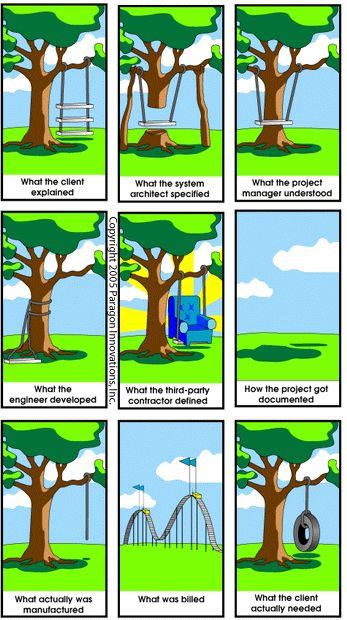

difference_count of solution Euler_Cauchy and data_given: [0.09599999999999992, 0.09657920000000081, 0.10134981463999954, 0.11054947941731119, 0.12469703488453243, 0.14463496513152196, 0.17159974275233103, 0.20732752719648673, 0.25420660860984823, 0.03499999999999992, 0.022534000000000165, 0.010891837199999421, 0.0004108080560797367, 0.011852608411492938, 0.02393569296261966, 0.03721758952999643, 0.05234873195024381, 0.07011890952489841]
difference_count of solution Runge-Kutte and data_given: [0.09700916666666723, 0.09457354135239537, 0.09760825176556337, 0.10626514526435715, 0.1210577448372312, 0.14289842704537858, 0.1731694582738501, 0.2138349311985741, 0.26760504252284845, 0.05599166666666666, 0.03758682244114597, 0.020829336875448523, 0.004995675693528545, 0.010594873258236603, 0.026621869040265422, 0.04380613064433958, 0.06295641078216163, 0.08502434176919005]


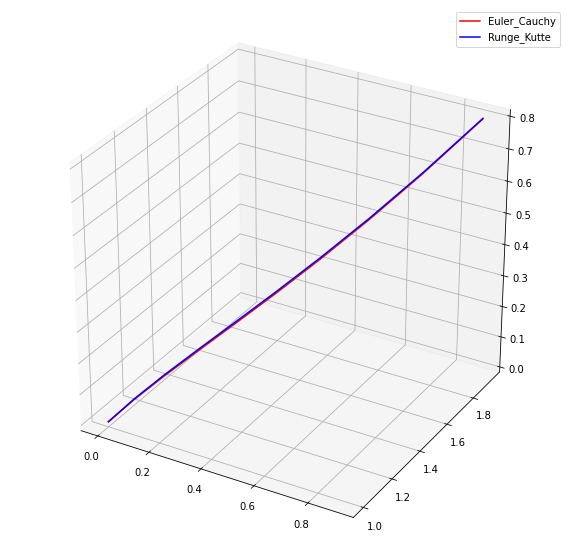

In [ ]:
solve('x*y+z', 0, 1, [0, 1], n=10, z0=0, s2='y - z')

difference_count of solution Euler_Cauchy and data_given: [4.999999985937064e-05, 5.000500157813695e-05, 5.001000418732639e-05, 5.001500746624289e-05, 5.002001119409075e-05, 5.0025017370420514e-05, 5.003002355378995e-05, 5.003503174354988e-05, 5.004003949805912e-05, 5.0045048816468526e-05, 5.005005947738379e-05, 5.0055071259310106e-05, 5.00600839406539e-05, 5.0065097299720977e-05, 5.0070111114717836e-05, 5.007512738419793e-05, 5.008014366572264e-05, 5.008516195764657e-05, 5.009017981733141e-05, 5.009519924292836e-05, 5.0100220012054986e-05, 5.0105241902217816e-05, 5.0110264690828195e-05, 5.01152881551975e-05, 5.0120312072536935e-05, 5.01253384404066e-05, 5.013036481537345e-05, 5.0135390974351615e-05, 5.0140418914603694e-05, 5.014544841284432e-05, 5.0150479245692284e-05, 5.0155511189663594e-05, 5.016054402117755e-05, 5.016557751655456e-05, 5.017061145201488e-05, 5.0175647824126333e-05, 5.018068418846623e-05, 5.018572032095773e-05, 5.019076043831809e-05, 5.019579987539883e-05, 5.02008384

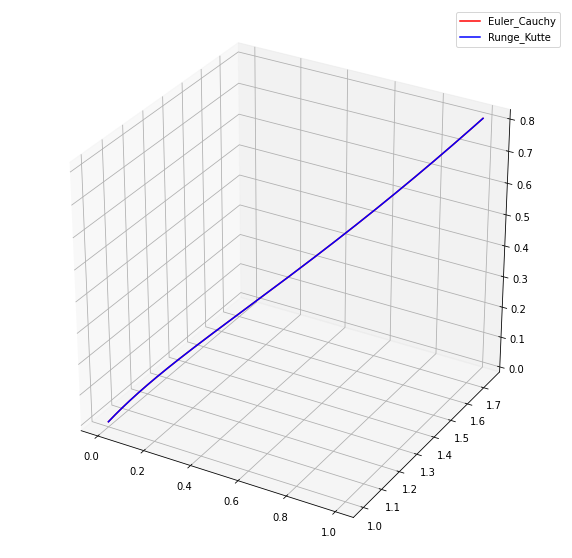

In [ ]:
solve('x**2+z', 0, 1, [0, 1], n=10000, z0=0, s2='y - z')

difference_count of solution euler and data_given: 17.405240983625344
difference_count of solution runge_kutte and data_given: 21.349607985374064
difference_count of solution scipy and data_given: 12748258005278.15


/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


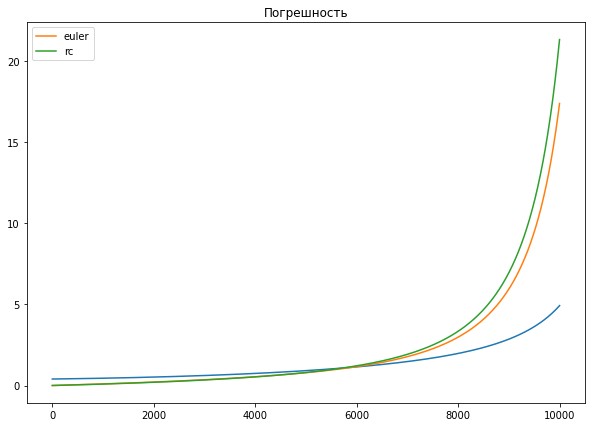

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:284: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:285: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:286: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:318: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
/usr/local/lib/pytho

'f(x) = 5.7633055341739245x^2-2.678765382760537x + 0.7287256276709444'

In [ ]:
solve('x*y+x+y+x**3*y**2', 0, 0.4, [0, 1], 10000)


difference_count of solution euler and data_given: 2.1552028760652164
difference_count of solution runge_kutte and data_given: 2.1731619646729627
difference_count of solution scipy and data_given: 1526.503286959788


/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


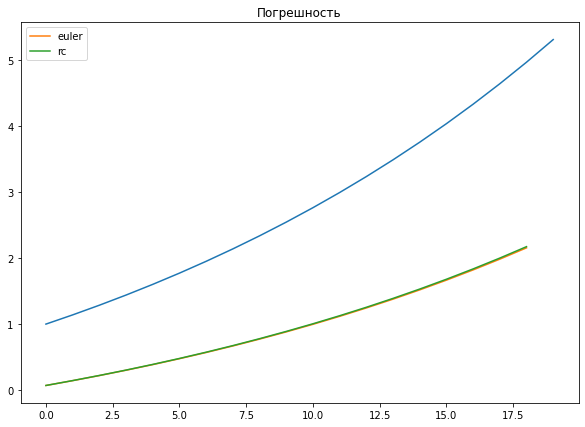

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:284: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:285: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:286: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:318: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
/usr/local/lib/pytho

'f(x) = 2.2243874880457413x^2-2.081303343537604x + 0.8822833197615185'

In [ ]:
solve('exp(x)', 1, 1, [1, 2], 20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


difference_count of solution euler and data_given: 0.4980611844285248
difference_count of solution runge_kutte and data_given: 0.730603032919388
difference_count of solution scipy and data_given: nan


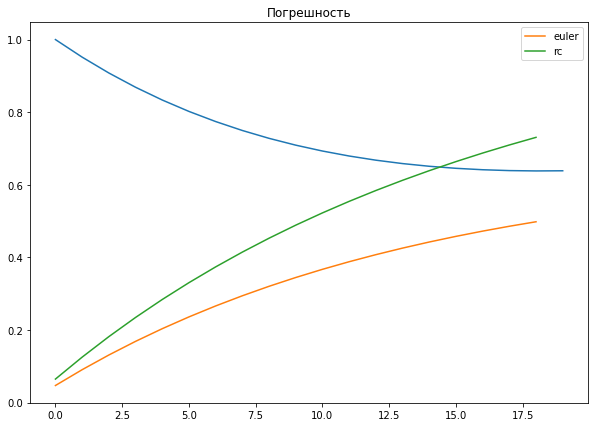

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:284: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:285: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:286: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:318: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
/usr/local/lib/pytho

'f(x) = 0.5240894816296322x^2-1.9069495008069164x + 2.3727746780252974'

In [ ]:
solve('np.log(x) - y', 1, 1, [1, 2], 20)

#Блок кода для преобразования строк

In [ ]:


def add_multiplication(s):
    if (s == ''):
        return '1'
    s_new = ''
    for i in range(len(s) - 1):
        if ('0'<=s[i]<='9' and not '0'<= s[i + 1] <='9' or s[i + 1] == 'y' and s[i] == 'x'):
            s_new += s[i]
            s_new += '*'
        else:
            s_new += s[i]
    s_new += s[-1]

    return s_new

def single_transform(s):
    n = len(s)
    i = 0
    while (i < n and s[i] == ' '):
        i += 1
    if (s[i] == 'y'):
        j = i + 1
        while (j < n and s[j] == "'"):
            j += 1
        s = '(' + add_multiplication(s[j:]) + ')*(' + s[i:j] + ')'
    else:
        j = i + 1
        while (j < n and s[j] != 'y'):
            j += 1
        if (j == n):
            s = '(' + add_multiplication(s) + ')'
        else:
            s = '(' + add_multiplication(s[:j]) + ')*(' + s[j:] + ')'

    return s.replace(" ", "")

def optimise(s):
    s.replace(" ", "")
    n = len(s)
    s_new = '' 
    indexes_of_dev = [0]
    left = dict()
    right = dict()
    r = False
    for i in range(1, n):
        if (s[i] == '-' or s[i] == '+' or s[i] == '='):
            indexes_of_dev.append(i)
    indexes_of_dev.append(n)
    for i in range(len(indexes_of_dev) - 1):
        
        if(s[indexes_of_dev[i]] != '='):
            s_new = '(+'
            s_new += single_transform(s[indexes_of_dev[i]:indexes_of_dev[i + 1]])+')'
            if (not r):
                if (s_new.count("'") + s_new.count('y') in left):
                    left[s_new.count("'") + s_new.count('y')] += s_new
                else:
                    left[s_new.count("'") + s_new.count('y')] = s_new
            else:
                if (s_new.count("'") + s_new.count('y') in left):
                    right[s_new.count("'") + s_new.count('y')] += s_new
                else:
                    right[s_new.count("'") + s_new.count('y')] = s_new
        else:
            s_new += '='
            r = True
            if (indexes_of_dev[i] + 1 != indexes_of_dev[i + 1]):
                s_new = '(+'
                s_new += single_transform(s[indexes_of_dev[i] + 1:indexes_of_dev[i + 1]])+')'
                if (not r):
                    if (s_new.count("'") + s_new.count('y') in left):
                        left[s_new.count("'") + s_new.count('y')] += s_new
                    else:
                        left[s_new.count("'") + s_new.count('y')] = s_new
                else:
                    if (s_new.count("'") + s_new.count('y') in left):
                        right[s_new.count("'") + s_new.count('y')] += s_new
                    else:
                        right[s_new.count("'") + s_new.count('y')] = s_new


    for el in right:
        if el in left:
            left[el] = left[el] + '+(-1)*' + right[el]
        else:
            left[el] = '+(-1)*' + right[el]
    return left    

def reorganize(a):
    t = list(a.items())
    t.sort(reverse = True)
    cur = t[0][1]
    i = len(cur) - 1
    while (cur[i] != 'y'):
        i -= 1
    i-=2
    dev = cur[:i]
    s_ans = ''
    for i in range(1, len(t)):
        cur = t[i]
        s_ans += '-('+cur[1]+')/(' + dev + ')'

    return s_ans 
    


def linear_into_system(s):
    max_cnt = 0
    cur_cnt = 0
    for el in s:
        if (el == "'"):
            cur_cnt += 1
        else:
            max_cnt = max(cur_cnt, max_cnt)
            cur_cnt = 0
    max_cnt = max(cur_cnt, max_cnt)
    
    if (max_cnt >2):
        print('я допилю конечно 3+ степень, но как-то может быть потом')

    else:
        a = optimise(s)
        s1 = ''
        if(max_cnt == 2):
            s1 = "y' = z"
        s2 = "y'=" + reorganize(a).replace("y'", "z")

        print(s1, "            ", s2)



    

        

#Тесты на преобразование строк

In [ ]:
linear_into_system("x**6y''+75xy'=287/x")

y' = z              y'=-((+(+75*x)*(z)))/((+(x**6))-(+(-1)*(+(287*/x)))/((+(x**6))


In [ ]:
linear_into_system("cos(x)y''+75xy'=287/x")

y' = z              y'=-((+(+75*x)*(z)))/((+(cos(x)))-(+(-1)*(+(287*/x)))/((+(cos(x)))


In [ ]:
linear_into_system("cos(x)y'+75xy=287/x")

              y'=-((+(+75*x)*(y)))/((+(cos(x)))-(+(-1)*(+(287*/x)))/((+(cos(x)))
